---
### Import Libraries

In [15]:
!pip install pycaret

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

from sklearn.metrics import *
import scikitplot as skplt

df = pd.read_csv("Copy_of_small_parkinsons_combined_data.csv")

### Exploratory Data Analysis

In [2]:
df.head()

,MDVP:RAP,MDVP:Shimmer,NHR,HNR,status,RPDE,DFA
0,0.00093,0.13878,0.070261,12.354,1,0.70809,0.76831
1,0.00159,0.13069,0.049389,13.735,1,0.69180,0.77992
2,0.00017,0.04046,0.002758,27.642,1,0.33216,0.61483
3,0.00024,0.02995,0.004375,25.185,1,0.37051,0.62018
4,0.00020,0.02734,0.003428,26.686,1,0.37031,0.63124


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:RAP      315 non-null    float64
 1   MDVP:Shimmer  315 non-null    float64
 2   NHR           315 non-null    float64
 3   HNR           315 non-null    float64
 4   status        315 non-null    int64  
 5   RPDE          315 non-null    float64
 6   DFA           315 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 17.4 KB


In [4]:
df.describe()

,MDVP:RAP,MDVP:Shimmer,NHR,HNR,status,RPDE,DFA
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,0.001953,0.047849,0.034183,20.641740,0.752381,0.492250,0.700211
std,0.002740,0.036170,0.063548,5.107784,0.432316,0.121727,0.064324
min,0.000020,0.006560,0.000618,3.425000,0.000000,0.178730,0.552210
25%,0.000260,0.020315,0.005880,17.898500,1.000000,0.402440,0.647790
50%,0.001150,0.035640,0.013051,21.090000,1.000000,0.493920,0.701404
75%,0.002520,0.065740,0.027891,24.640500,1.000000,0.584944,0.755466
max,0.021440,0.220660,0.460579,33.197000,1.000000,0.778480,0.821364


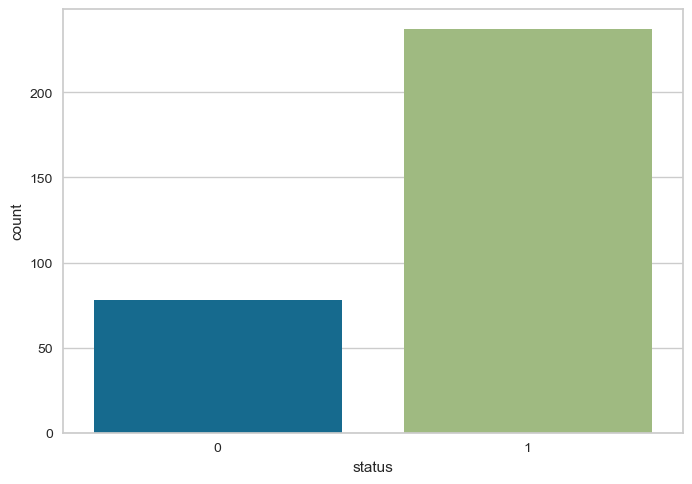

In [5]:
ax = sns.countplot(x="status", data=df)

### Split training & test dataset

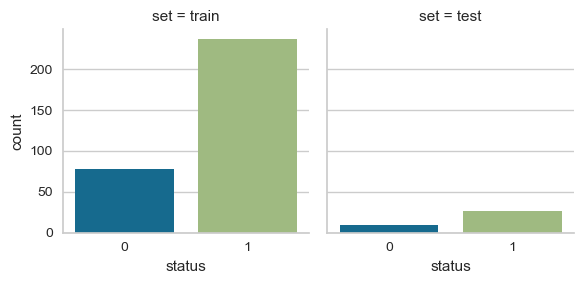

Training dataset           : 315
Unseen data for validation : 35


In [6]:
test_df = pd.read_csv("Copy_of_smallest_parkinsons_combined_data.csv").reset_index(drop=True)
train_df = df.reset_index(drop=True)

test_df['set'] = 'test'
train_df['set'] = 'train'

ax = sns.catplot(x="status", col="set", data=pd.concat([train_df, test_df]), kind="count", height=3)
plt.show()

print('Training dataset           :', len(train_df))
print('Unseen data for validation :', len(test_df))

### Setup environment

In [7]:
clf1 = setup(data = train_df, target = 'status',ignore_features = ['name'], fix_imbalance=True, session_id=123, remove_outliers = True)




,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Original data shape,"(315, 8)"
4,Transformed data shape,"(409, 8)"
5,Transformed train set shape,"(314, 8)"
6,Transformed test set shape,"(95, 8)"
7,Ignore features,1
8,Numeric features,6
9,Categorical features,1


### Model selection

In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7915,0.7784,0.8658,0.8660,0.8624,0.4129,0.4247,0.6220
lightgbm,Light Gradient Boosting Machine,0.7832,0.8049,0.8450,0.8734,0.8563,0.4013,0.4131,0.5660
rf,Random Forest Classifier,0.7587,0.7871,0.8289,0.8563,0.8396,0.3394,0.3470,0.5730
gbc,Gradient Boosting Classifier,0.7583,0.7920,0.8345,0.8517,0.8404,0.3311,0.3393,0.4910
dt,Decision Tree Classifier,0.7335,0.6393,0.8120,0.8341,0.8204,0.2795,0.2838,0.3290
ada,Ada Boost Classifier,0.7015,0.6915,0.7599,0.8353,0.7935,0.2508,0.2582,0.4670
knn,K Neighbors Classifier,0.6855,0.6998,0.7178,0.8568,0.7756,0.2484,0.2686,0.3040
lda,Linear Discriminant Analysis,0.6853,0.7780,0.6912,0.8740,0.7696,0.2899,0.3124,0.3620
ridge,Ridge Classifier,0.6682,0.0000,0.6702,0.8721,0.7521,0.2698,0.2947,0.3220
lr,Logistic Regression,0.6647,0.7403,0.6599,0.8769,0.7465,0.2723,0.2986,0.9380


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

### Create Extra Trees Classifier Model

In [8]:
extraTreesClassifier = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7273,0.8471,0.7647,0.8667,0.8125,0.3196,0.3281
1,0.8636,0.8353,0.8824,0.9375,0.9091,0.6374,0.6421
2,0.8636,0.8647,0.8824,0.9375,0.9091,0.6374,0.6421
3,0.8182,0.9000,0.8824,0.8824,0.8824,0.4824,0.4824
4,0.7727,0.8353,0.8824,0.8333,0.8571,0.3038,0.3068
5,0.7727,0.7235,0.8824,0.8333,0.8571,0.3038,0.3068
6,0.7273,0.8542,0.8750,0.7778,0.8235,0.2326,0.2406
7,0.8636,0.8698,0.9375,0.8824,0.9091,0.6374,0.6421
8,0.7727,0.7500,0.8750,0.8235,0.8485,0.3956,0.3985


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuned Model

In [9]:
tuned_extraTreesClassifier = tune_model(extraTreesClassifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5909,0.8824,0.5294,0.9000,0.6667,0.2205,0.2772
1,0.7727,0.7412,0.8235,0.8750,0.8485,0.3956,0.3985
2,0.7273,0.9294,0.7059,0.9231,0.8000,0.3945,0.4312
3,0.6364,0.8118,0.6471,0.8462,0.7333,0.1927,0.2106
4,0.7727,0.8471,0.8235,0.8750,0.8485,0.3956,0.3985
5,0.8182,0.7882,0.8824,0.8824,0.8824,0.4824,0.4824
6,0.5909,0.7500,0.6250,0.7692,0.6897,0.1081,0.1132
7,0.8636,0.8229,0.8750,0.9333,0.9032,0.6733,0.6773
8,0.6364,0.7500,0.6875,0.7857,0.7333,0.1698,0.1736


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate training performance

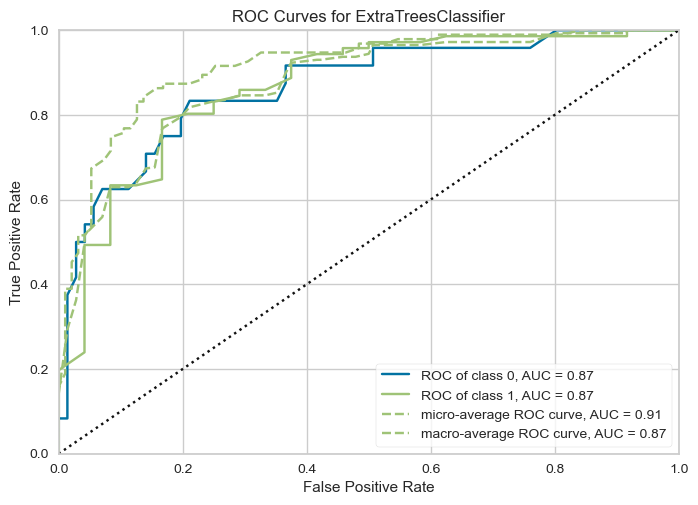

In [10]:
plot_model(tuned_extraTreesClassifier, plot = 'auc')

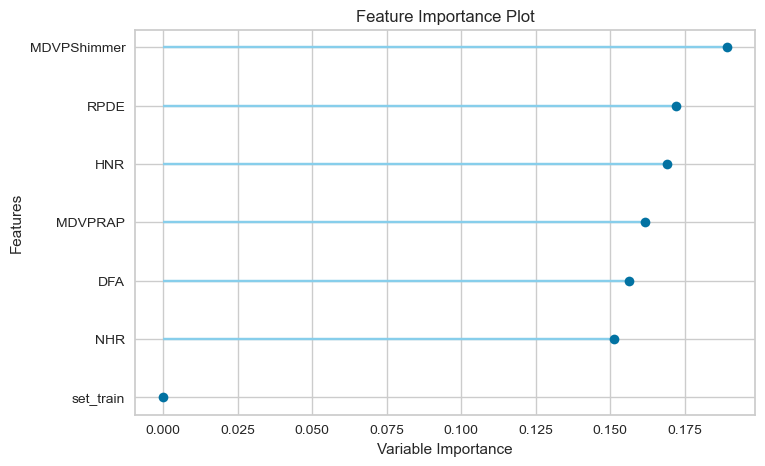

In [11]:
plot_model(tuned_extraTreesClassifier, plot='feature')

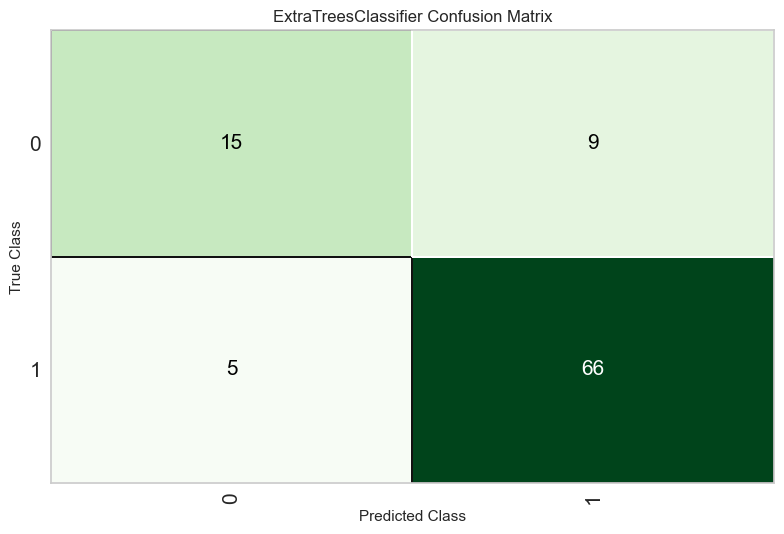

In [12]:
plot_model(tuned_extraTreesClassifier, plot = 'confusion_matrix')

### Evaluate on unseen data

In [13]:
final_extraTreesClassifier = finalize_model(tuned_extraTreesClassifier)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8286,0.8526,0.9231,0.8571,0.8889,0.5161,0.5230


              precision    recall  f1-score   support

   parkinson       0.71      0.56      0.63         9
      normal       0.86      0.92      0.89        26

    accuracy                           0.83        35
   macro avg       0.79      0.74      0.76        35
weighted avg       0.82      0.83      0.82        35



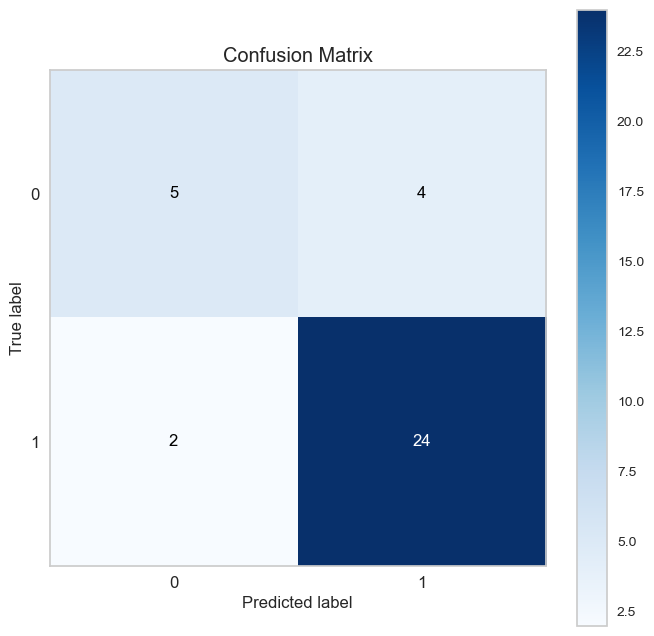

In [14]:
unseen_predictions = predict_model(final_extraTreesClassifier, data=test_df)
class_names=['parkinson', 'normal']
print(classification_report(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, target_names=class_names,zero_division=0))
cm = skplt.metrics.plot_confusion_matrix(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, figsize=(8, 8), normalize=False)


